In [49]:
from pandas import Series, DataFrame
import pandas as pd
import re
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [50]:
train=pd.read_csv("C:/Users/Avani/Downloads/all/Train_rev1/Train_rev1.csv")

In [51]:
train.head(2)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk


In [52]:
train.columns.values

array(['Id', 'Title', 'FullDescription', 'LocationRaw',
       'LocationNormalized', 'ContractType', 'ContractTime', 'Company',
       'Category', 'SalaryRaw', 'SalaryNormalized', 'SourceName'], dtype=object)

### Part A Basic Text Mining

Randomly select 2500 data points (the training dataset train_rev1 contains nearly 250k) for ease of analysis. <br/>
(A1) What are the top 5 parts of speech in the job descriptions? How frequently do they appear? How do these numbers change if you exclude stopwords?

In [53]:
train_subset=train[['Id', 'Title', 'FullDescription']]

In [54]:
train_subset.head(2)

,Id,Title,FullDescription
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...


In [55]:
train_subset1=train_subset.sample(n=2500, replace=False)

In [56]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [57]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Avani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Avani\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [58]:
# Concatenating the job descriptions, each row in tempx contains all job descriptions concatenated row by row from job descriptions column
train_subset1['tempx']=train_subset1['FullDescription'].str.cat(sep=' ')

# Tempx has only one unique value
len(train_subset1['tempx'].value_counts())

1

In [59]:
# converting the tempx dataitem to lowercase & converting to utf-8
pos=train_subset1['tempx'].iloc[0].lower()
pos =pos.decode('utf-8')

In [60]:
pos[:100]

u'due to promotion from within an exciting opportunity has risen for an accounts payable assistant. we'

In [61]:
#### this is for getting exact parts of speech
import nltk
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Avani\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [62]:
# tokenizing, we remove all punctuations, numbers etc.
from string import punctuation
for p in punctuation:
    pos =pos.replace(p,'')
s =re.sub('[0-9]+','',pos)
words =re.findall('\w+',s)
POS=nltk.pos_tag(words)
words =re.findall('\w+',s)
POS=nltk.pos_tag(words, tagset='universal')

In [63]:
POS_table=pd.DataFrame(POS)

In [64]:
POS_table.columns=["Words","POS"]

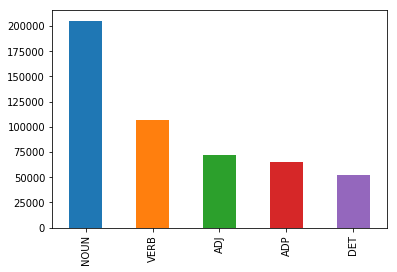

In [67]:
POS_table['POS'].value_counts()[:5].plot(kind='bar')

In [68]:
# Top 5 parts of Speech
POS_table['POS'].value_counts()[:5]

NOUN    205231
VERB    106607
ADJ      71696
ADP      64991
DET      52133
Name: POS, dtype: int64

In [69]:
# Remove Stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_sentence = [w for w in POS_table['Words'] if not w in stop_words]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Avani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
mapped=POS_table['Words'].isin(stop_words)

In [71]:
filtered=POS_table[-mapped]

In [72]:
filtered['POS'].value_counts()[:5]

NOUN    204335
VERB     74473
ADJ      68718
ADV      11028
ADP       5756
Name: POS, dtype: int64

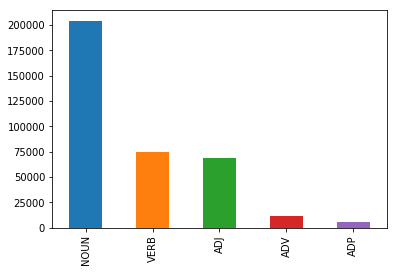

In [73]:
filtered['POS'].value_counts()[:5].plot(kind='bar')

A2. Does this data support Zipf’s law? Plot the most common 100 words in the data against the theoretical prediction of the law. For this question, do not remove stopwords. Also do not perform stemming or lemmatization. 

In [74]:
from collections import Counter
count_of_words=Counter(POS)

In [75]:
# creating oredred count of words table
count_of_words=pd.Series(count_of_words)
count_of_words=pd.DataFrame(count_of_words)
count_of_words.head(10)

0
a     DET   15245
aa    ADJ      12
      ADP       1
      ADV       1
      NOUN     16
      VERB      7
aarca NOUN      2
aaron NOUN      3
aat   ADJ       2
      ADV       1

In [76]:
count_of_words=count_of_words.reset_index()

In [77]:
count_of_words.columns=['word','POS','Frequency']
count_of_words=count_of_words.sort_values(by='Frequency', ascending=False)

In [78]:
check_top_word=count_of_words['Frequency'][0]
check_top_word

15245

In [79]:
count_of_words_filtered=count_of_words[:100]
count_of_words_filtered.head(5)

,word,POS,Frequency
1020,and,CONJ,26241
22729,the,DET,20879
23008,to,PRT,19924
0,a,DET,15245
15631,of,ADP,14350


In [80]:
count_of_words_filtered['Rank']=count_of_words_filtered['Frequency'].rank(ascending = False)

In [81]:
count_of_words_filtered=count_of_words_filtered.set_index('word')

In [82]:
constant = count_of_words_filtered['Rank'].iloc[-1]*count_of_words_filtered['Frequency'].iloc[-1]

In [83]:
count_of_words_filtered['Y']=np.log(count_of_words_filtered['Rank'])
count_of_words_filtered['X']=np.log((count_of_words_filtered['Frequency'])/constant)

Doing Linear Regression

In [84]:
import statsmodels.api as sm
from patsy import dmatrices
Y, X = dmatrices('Y~X', data=count_of_words_filtered, return_type='dataframe')
##########
model = sm.OLS(Y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     7259.
Date:                Tue, 11 Sep 2018   Prob (F-statistic):           1.02e-93
Time:                        21:49:00   Log-Likelihood:                 81.998
No. Observations:                 100   AIC:                            -160.0
Df Residuals:                      98   BIC:                            -154.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3674      0.048     -7.619      0.0

### Observation for A2 <br/>
1. We see that the coefficient of X is very-very close to -1. Hence, our dataset follows Zipf's law. <br/>
2. We also plotted 2 simple graphs to see the trend

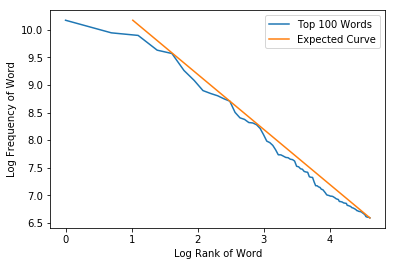

In [85]:
count_of_words_filtered['log Frequency']=np.log(count_of_words_filtered['Frequency'])
matplotlib.pyplot.plot(count_of_words_filtered['Y'], count_of_words_filtered['log Frequency'], linestyle='-',label='Top 100 Words')
matplotlib.pyplot.plot(log(constant)-count_of_words_filtered['log Frequency'],count_of_words_filtered['log Frequency'], linestyle='-', label='Expected Curve')
ylabel("Log Frequency of Word")
xlabel("Log Rank of Word")
legend(loc='best')

In [86]:
x=count_of_words_filtered['Frequency'].iloc[1]
k=[]
for i in range(1,101):
    l=x/i
    k.append(l)

In [87]:
count_of_words_filtered["Frequency_expected"]=k

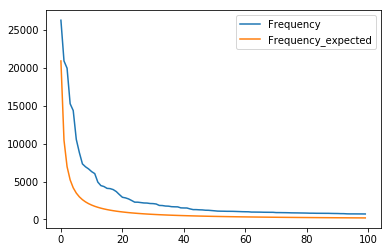

In [88]:
count_of_words_filtered.reset_index().sort_values(by='Rank')[['Frequency','Frequency_expected']].plot(kind='line')

A3. If we remove stopwords and lemmatize the data, what are the 10 most common words? What are their frequencies?

In [89]:
# list after removing stopwords
filtered.head(2)

,Words,POS
0,due,ADJ
2,promotion,NOUN


In [90]:
#nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()
filtered['Lemmas'] = map(lemma.lemmatize, filtered['Words'])

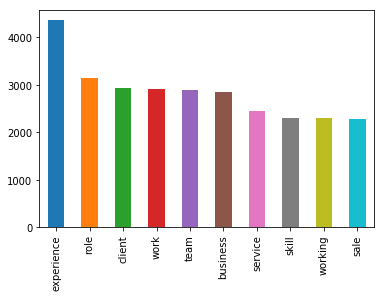

In [91]:
filtered['Lemmas'].value_counts()[:10].plot(kind='bar')

In [92]:
pd.DataFrame(filtered['Lemmas'].value_counts()[:10])

,Lemmas
experience,4364
role,3152
client,2936
work,2909
team,2902
business,2852
service,2448
skill,2310
working,2309
sale,2277


### Part B Testing Predictive power of text & compare it with numeric

B1. Ignore the job descriptions, and train a model to predict high/low salary from all the numeric columns, e.g., part time/full time, contract vs. others, type of job (a lot of dummy variables), location (instead of using a huge number of dummy variables, you can use a list of cities in England with highest cost of living, and create a 0/1 variable which is 1 if the job is in one of those cities, else 0). Use the Naïve Bayes classifier. What is the accuracy of your model?    

Now build a classification model with text (full job description) as the only predictor. There are two versions of Naïve Bayes – binomial and multinomial; for the moment, let’s not bother about the theoretical underpinnings! You can use either one for this assignment. For all models, show the confusion matrix.


In [93]:
train.columns.values


array(['Id', 'Title', 'FullDescription', 'LocationRaw',
       'LocationNormalized', 'ContractType', 'ContractTime', 'Company',
       'Category', 'SalaryRaw', 'SalaryNormalized', 'SourceName'], dtype=object)

In [94]:
train['LocationNormalized'].unique()

array(['Dorking', 'Glasgow', 'Hampshire', ..., 'Bollington',
       'South Bermonsey', 'Temple'], dtype=object)

In [95]:
train['Salary Band']=pd.qcut(train)

TypeError: qcut() takes at least 2 arguments (1 given)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train['FullDescription'])
X_train_counts.shape

In [ ]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, train[''])

In [ ]:
data=Counter("This is my life".split())

In [ ]:
DataFrame.from_dict(data, orient='index').T

In [ ]:
datatest=pd.DataFrame({'text': ["This is my life", "I make my own Rules"]})

In [ ]:
datatest